In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer


from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

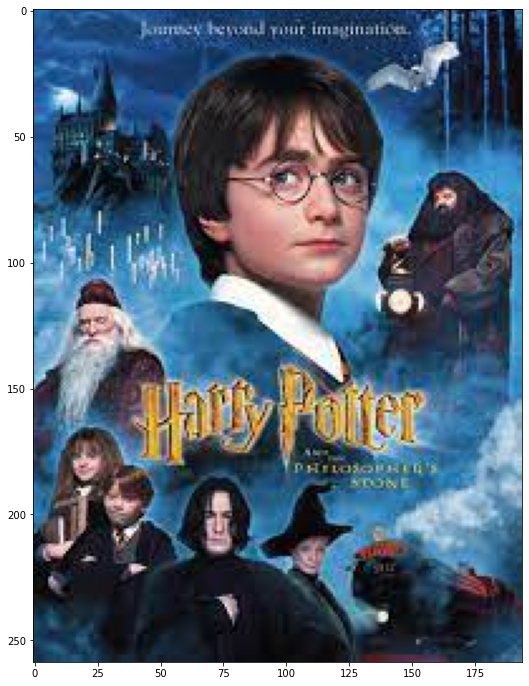

In [3]:
plt.figure(figsize=(12,12))
img=plt.imread('hp.jpg')
plt.imshow(img)
plt.show();

In [2]:
df=pd.read_csv("hp_script.csv", encoding='cp1252')

In [3]:
df.head()

,ID_number,scene,character_name,dialogue
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr..."
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad."
3,4,1,Minerva McGonagall,And the boy?
4,5,1,Albus Dumbledore,Hagrid is bringing him.


In [4]:
df.tail()

,ID_number,scene,character_name,dialogue
788,789,34,Rubeus Hagrid,"Go on. On with you, on with you now. Oh, now l..."
789,790,34,Harry Potter,"But Hagrid, we're not allowed to do magic away..."
790,791,34,Rubeus Hagrid,"I do, but your cousin don't, do he? Eh? Hmmhmm"
791,792,34,Hermione Granger,"Feels strange to be going home, doesn't it?"
792,793,34,Harry Potter,"I'm not going home, not really."


In [5]:
df.sample(5)

,ID_number,scene,character_name,dialogue
780,781,33,Albus Dumbledore,"Another year, gone! And now, as I understand i..."
449,450,19,Lee Jordan,The players take their positions as Madam Hooc...
774,775,32,Harry Potter,What is it?
194,195,10,Harry Potter,"These aren't real chocolate frogs, are they?"
243,244,12,Sorting Hat,"Not Slytherin, eh? Are you sure? You could be ..."


In [6]:
df.describe()

,ID_number,scene
count,793.000000,793.000000
mean,397.000000,17.075662
std,229.063674,8.977909
min,1.000000,1.000000
25%,199.000000,10.000000
50%,397.000000,18.000000
75%,595.000000,25.000000
max,793.000000,34.000000


In [7]:
df.corr()

,ID_number,scene
ID_number,1.000000,0.994603
scene,0.994603,1.000000


In [8]:
df.columns.tolist()

['ID_number', 'scene', 'character_name', 'dialogue']

In [9]:
df['dialogue_wordcount'] = df['dialogue'].map(lambda x:len(re.findall(r'\w+', x)))

In [10]:
df

,ID_number,scene,character_name,dialogue,dialogue_wordcount
0,1,1,Albus Dumbledore,"I should have known that you would be here, Pr...",11
1,2,1,Minerva McGonagall,"Good evening, Professor Dumbledore. Are the ru...",9
2,3,1,Albus Dumbledore,"I'm afraid so, Professor. The good, and the bad.",10
3,4,1,Minerva McGonagall,And the boy?,3
4,5,1,Albus Dumbledore,Hagrid is bringing him.,4
...,...,...,...,...,...
788,789,34,Rubeus Hagrid,"Go on. On with you, on with you now. Oh, now l...",44
789,790,34,Harry Potter,"But Hagrid, we're not allowed to do magic away...",15
790,791,34,Rubeus Hagrid,"I do, but your cousin don't, do he? Eh? Hmmhmm",11
791,792,34,Hermione Granger,"Feels strange to be going home, doesn't it?",9


In [11]:
df['character_name'].unique()

array(['Albus Dumbledore', 'Minerva McGonagall', 'Rubeus Hagrid',
       'Petunia Dursley', 'Dudley Dursley', 'Vernon Dursley',
       'Harry Potter', 'Snake', 'Tom', 'Doris Crockford',
       'Quirinus Quirrell', 'Goblin', 'Griphook', 'Garrick Ollivander',
       'Guard', 'Molly Weasley', 'George Weasley', 'Fred Weasley',
       'Ginny Weasley', 'Ron Weasley', 'Trolley lady', 'Hermione Granger',
       'Neville Longbottom', 'Draco Malfoy', 'Sorting Hat',
       'Seamus Finnigan', 'Percy Weasley', 'Nearly Headless Nick',
       'Bloody Baron', 'The Fat Lady', 'Severus Snape', 'Rolanda Hooch',
       'Class', 'Argus Filch', 'Oliver Wood', 'Filius Flitwick',
       'Lee Jordan', 'Marcus Flint', 'Man', 'Firenze', 'Voldemort'],
      dtype=object)

In [12]:
df['character_name'].value_counts()

Harry Potter            230
Ron Weasley             120
Hermione Granger         92
Rubeus Hagrid            81
Minerva McGonagall       31
Albus Dumbledore         24
Vernon Dursley           23
Dudley Dursley           17
Quirinus Quirrell        17
Neville Longbottom       14
Petunia Dursley          13
Draco Malfoy             13
Rolanda Hooch            12
Severus Snape             9
Lee Jordan                8
Oliver Wood               8
Voldemort                 8
Sorting Hat               7
Percy Weasley             6
Argus Filch               6
Nearly Headless Nick      5
Seamus Finnigan           5
Fred Weasley              5
Firenze                   5
Molly Weasley             5
Filius Flitwick           4
George Weasley            4
Griphook                  3
Garrick Ollivander        3
Goblin                    2
Class                     2
Tom                       2
Man                       1
Marcus Flint              1
Snake                     1
The Fat Lady        

In [13]:
df['character_name'].value_counts().max()

230

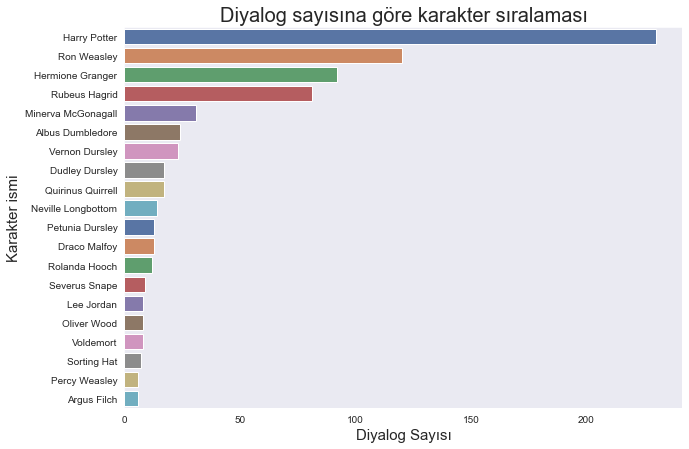

In [14]:
sns.set_style('dark')
plt.figure(figsize=(10,7))
sns.countplot(y='character_name', data=df, order=df.character_name.value_counts().iloc[:20].index, palette="deep")
plt.xlabel('Diyalog Sayısı', fontsize=15)
plt.ylabel('Karakter ismi', fontsize=15)
plt.title('Diyalog sayısına göre karakter sıralaması', fontsize=20)
plt.show()

<AxesSubplot:>

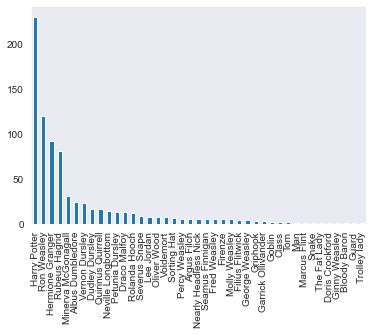

In [15]:
df.character_name.value_counts().plot.bar()

In [16]:
df["dialogue"]=df["dialogue"].str.lower()               
df["dialogue"]=df["dialogue"].str.replace("[^\w\s]","") 
df["dialogue"]=df["dialogue"].str.replace("\d+","") 
df["dialogue"]=df["dialogue"].str.replace("\n"," ").replace("\r","") 

In [17]:
df.shape

(793, 5)

In [18]:
df["dialogue"][0]

'i should have known that you would be here professor mcgonagall'

In [19]:
df["dialogue"][792]

'im not going home not really'

In [20]:
df=df[df.dialogue.notna()]

In [21]:
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['dialogue'].values]

In [22]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarıkaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sarıkaya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(i) for i in words] for words in df['dialogue'].values]

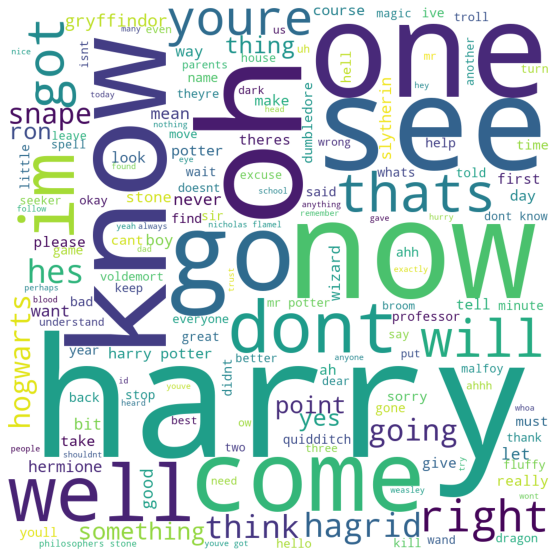

In [25]:
text = " ".join(line for line in df["dialogue"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [26]:
harry = df[df['character_name']=='Harry Potter']

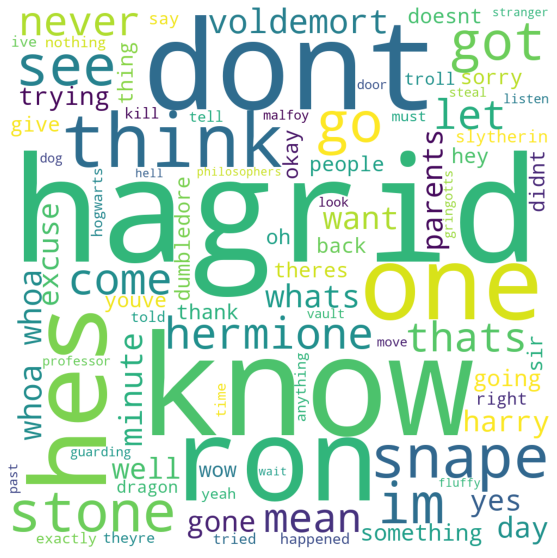

In [28]:
harry_text = " ".join(line for line in harry["dialogue"])
wordcloud = WordCloud(width=1000, height=1000, background_color="white", min_font_size=15).generate(harry_text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()